# 02. Absorbing Object
A simple example using the AbsorbingObject

## Imports

In [5]:
import matplotlib.pyplot as plt

import fdtd
fdtd.set_backend("numpy")

## Constants

In [6]:
WAVELENGTH = 1550e-9
SPEED_LIGHT: float = 299_792_458.0  # [m/s] speed of light

## Grid setup

In [7]:
# create FDTD Grid
grid = fdtd.Grid(
    (1.5e-5, 1.5e-5, 1),  # 2D grid
    grid_spacing=0.1 * WAVELENGTH,
    permittivity=2.5,  # same as object
)

# sources
grid[15, :] = fdtd.LineSource(period=WAVELENGTH / SPEED_LIGHT, name="source")

# detectors
grid[-15, :, 0] = fdtd.LineDetector(name="detector")

# x boundaries
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

# The absorbing object fills the whole grid
grid[10:-10, 10:-10, :] = fdtd.AbsorbingObject(
    permittivity=2.5, conductivity=1e-6, name="absorbin_object"
)

## Simulation without absorption:

In [4]:
grid.run(250, progress_bar=False)

## Visualization

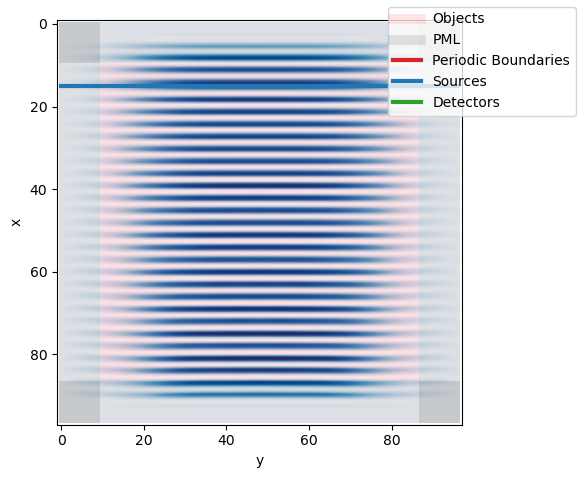

In [5]:
grid.visualize(z=0)